In [285]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
import itertools

In [286]:
#
# The piecewise linear activation function that clips weighted input. 
# A scalar function (numbers in, numbers out)
#
# input: weighted input 
# output: activation
#
def piecewise_linear(weighted_input):
    u = 10
    l = -10
    if(weighted_input > u):
        return u
    elif(weighted_input < l):
        return l
    else:
        return weighted_input        

In [287]:
#
# Threshold  activation function
#
def threshold(weighted_input):
    u = 10
    l = -10
    theta = 0
    if(weighted_input > theta):
        return u
    else:
        return l       

In [288]:
#
# A function that corresponds to a 2 node, fully connected recurrent network
# 
# This is a function on vectors;a function from one activation vector to another. 
# It is also a rule that defines a dynamical system.  A way to go from an initial point
# in state space to a future point.  You can edit which activation function is used
# if you like.
# 
# input: current activation vector 
# output: activation vector after processing by the network
# 
#
def recurrent_net(activation_vector):
    weighted_inputs = activation_vector.dot(weight_matrix)
    act_function = np.vectorize(piecewise_linear)
    # act_function = np.vectorize(threshold)
    return act_function(weighted_inputs)

In [289]:
# 
# EDIT WEIGHT MATRIX HERE
#
# Weight matrix for the network, which defines a dynamical system on a 2-dimensional
# activation space

# Rotation
# angle = math.pi/12
# weight_matrix = np.array([[math.cos(angle),-math.sin(angle)],[math.sin(angle),math.cos(angle)]])

# Stretching by k
# k = -2.4 # -1, 10
# weight_matrix = np.array([[k,0],[0,1]])

# Identity
# weight_matrix = np.array([[1,0],[0,1]])

# Other examples
# weight_matrix = np.array([[-1,1],[-1.1,-.1]])
# weight_matrix = np.array([[1,.5],[-.5,0]]) # One fixed point attractor
# weight_matrix = np.array([[-1,1],[-1.1,-.1]])
weight_matrix = np.array([[-1,1],[-1.1,-.1]])

In [290]:
#
# Print eigenvalues (optional), which tells us about the underlying dynamics,
# prior to clipping by the piecewise linear activation function.
#
# In the discrete case, when iterating a map, then the magnitude of the eigenvalues
# tells us about the dynamics. 
# If magnitude of all evals > 1, then the origin is a repeller
# If magnitude of all evals < 1, then the origin is an attractor
# If some are negative and some positive, the origin is a saddle
# If some evals have magnitude = 1, then we have a degenerate case
#
# In the continuous case, when the matrix describes an ODE, see:
# http://www.cnbc.cmu.edu/~bard/xppfast/lin2d.html
# But that case cannot easily be applied here.
#
# eigenvalues = np.linalg.eigvals(weight_matrix)
# print("evals",eigenvalues)
# print("magnitude of evals", np.linalg.norm(eigenvalues[0]),",",np.linalg.norm(eigenvalues[1]))

In [291]:
#
# EDIT INITIAL CONDITIONS HERE
#

# A list of initial conditions to test.  Orbits arising from these initial conditions 
# will then be plotted.
#
init_conditions = [np.array([.5,.5])] # A single initial condition. You can change the numbers!
# init_conditions = [np.array([.5,.5]),np.array([.5,.56])] # Initial condition with perturbation to test for attractors
# init_conditions = [np.array([.5,.5]), np.array([-.5,-.5])] # A list of initial conditions
# grid = np.array(list(itertools.product([.1,.4,1,5], repeat=2)))
# grid = np.array(list(itertools.product([1,2,3,4,5], repeat=2)))
# init_conditions = grid

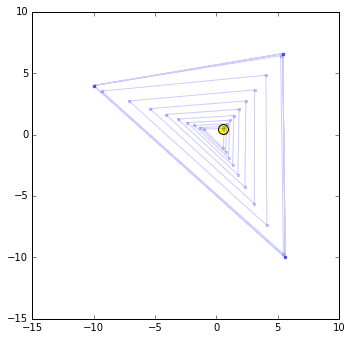

In [292]:
#
# Plot orbits given initial conditions and weights
# 
for ic in init_conditions:
    orbit_length = 40  # EDIT: You can set how long the orbit to display is here
    orbit = np.zeros((orbit_length,2))
    orbit[0] = ic
    plt.scatter(ic[0],ic[1], c="yellow", s=100) # Plot initial conditions
    for i in range(1,orbit_length):
        orbit[i] = recurrent_net(orbit[i-1])
    plt.plot(orbit[:,0],orbit[:,1],'.-',alpha = .2, color = 'blue')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(5.5, 5.5) # Set plot size here
# fig.savefig('phase_portrait.png') # Use this to save an image instead of taking a screenshot

In [293]:
# 
# Function to print orbits relative to initial condition
#
def print_orbit(init_condition):
    print("init condition:",init_condition)
    orbit_length = 100 # EDIT: Set how long to show orbits for here
    orbit = np.zeros((orbit_length,2))
    orbit[0] = init_condition
    for i in range(1,orbit_length):
        orbit[i] = recurrent_net(orbit[i-1])
        print(np.round(orbit[i],5))
    print("-----------")

In [294]:
#
# Print orbits for each initial condition
#
for ic in init_conditions:
    print_orbit(ic)

init condition: [ 0.5  0.5]
[-1.05  0.45]
[ 0.555 -1.095]
[ 0.6495  0.6645]
[-1.38045  0.58305]
[ 0.7391  -1.43876]
[ 0.84354  0.88297]
[-1.8148   0.75524]
[ 0.98404 -1.89033]
[ 1.09532  1.17307]
[-2.3857   0.97801]
[ 1.30989 -2.4835 ]
[ 1.42196  1.55824]
[-3.13602  1.26614]
[ 1.74327 -3.26264]
[ 1.84563  2.06953]
[-4.12212  1.63868]
[ 2.31957 -4.28599]
[ 2.39501  2.74817]
[-5.418   2.1202]
[ 3.08579 -5.63002]
[ 3.10724  3.64879]
[-7.12091  2.74236]
[ 4.10431 -7.39514]
[ 4.03034  4.84383]
[-9.35855  3.54596]
[ 5.45799 -9.71315]
[ 5.22647  6.42931]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 5.4  6.6]
[-10.   4.]
[  5.6 -10. ]
[ 